# SENSITIVE LIST CREATOR PART

In [21]:
import wikipedia
import spacy
from wordcloud import WordCloud

sensitive_diseases=['AIDS','HIV','TB','CANCER','BIPOLAR','MENTAL-DISORDER','BRAIN TUMOR']
sensitive_drugs = ['Abacavir','Didanosine','Emtricitabine','Lamivudine','Stavudine','Tenofovir','Zidovudine','Isoniazid','Rifampicin','Pyrazinamide','Ethambutol','RisPeridone','Olanzapine','Quetiapine','ziprasidone','paliperidone','lurasidone','afinitor','avastin','bevacizumab','bicnu','carmustine','everolinus','colozapine','AC-T']

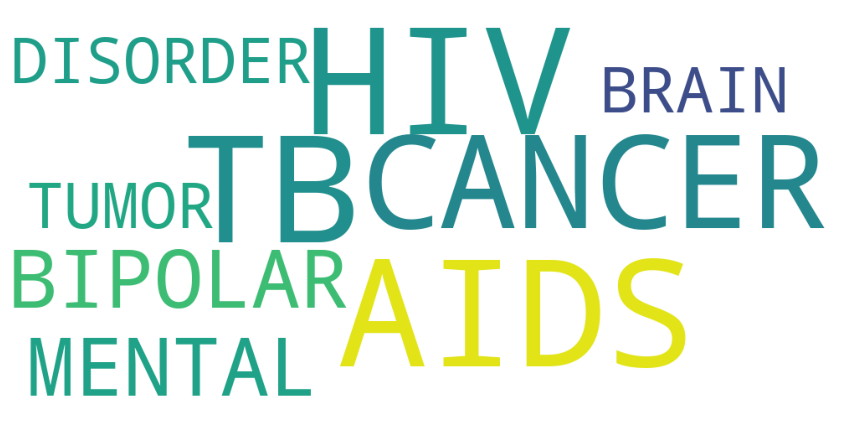

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
#convert list to string and generate
unique_string=(" ").join(sensitive_diseases)
#maskArray = npy.array(Image.open("Downloads/shild.jpg"))
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

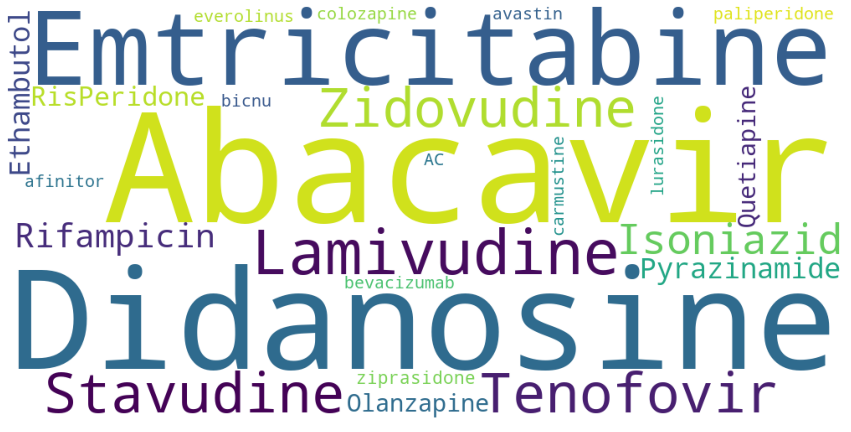

In [23]:
import matplotlib.pyplot as plt

#convert list to string and generate
unique_string=(" ").join(sensitive_drugs)
#maskArray = npy.array(Image.open("Downloads/shild.jpg"))
wordcloud = WordCloud(width = 1000, height = 500,background_color="white").generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
file = open("/home/mohit/snomed.txt",'r')
final_sensitive_list = []

for line in file:
    strip_line = line.strip()
    final_sensitive_list.append(strip_line)
file.close()
final_sensitive_list

In [ ]:
from collections import defaultdict
from pathlib import Path
import pandas as df
results = defaultdict(list)
my_dir_path = "finaldocuments"


for file in Path(my_dir_path).iterdir(): 
    with open(file, "r") as file_open: 
        results["file"].append(file.name)
        results["file_name"].append(file)
        results["text"].append(file_open.read())
df1 = df.DataFrame(results)  

In [ ]:
df1

# CHECK THE DOCUMENT SENSITIVE OR NOT USING SPACY LIBRARIES

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

class Preprocess:
    def __int__(self):
        pass

    def autospell(self,text):
       
        #correct the spelling of the word.
       
        spells = [spell(w) for w in (nltk.word_tokenize(text))]
        return " ".join(spells)

    def to_lower(self,text):
        
       # :param text:
        #:return:
         #   Converted text to lower case as in, converting "Hello" to "hello" or "HELLO" to "hello".
        
        return text.lower()

    def remove_numbers(self,text):
        
        #take string input and return a clean text without numbers.
       # Use regex to discard the numbers.
        
        output = ''.join(c for c in text if not c.isdigit())
        return output

    def remove_punct(self,text):
      
        #take string input and clean string without punctuations.
        #use regex to remove the punctuations.
       
        return ''.join(c for c in text if c not in punctuation)

    def remove_Tags(self,text):
        
        #take string input and clean string without tags.
        #use regex to remove the html tags.
        
        cleaned_text = re.sub('<[^<]+?>', '', text)
        return cleaned_text

    def sentence_tokenize(self,text):
       
        #take string input and return list of sentences.
       # use nltk.sent_tokenize() to split the sentences.
        
        sent_list = []
        for w in nltk.sent_tokenize(text):
            sent_list.append(w)
        return sent_list

    def word_tokenize(self,text):
        
        #:param text:
        #:return: list of words
       
        return [w for sent in nltk.sent_tokenize(text) for w in nltk.word_tokenize(sent)]

    def remove_stopwords(self,sentence):
    
        #removes all the stop words like "is,the,a, etc."
      
        stop_words = stopwords.words('english')
        return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

    def stem(self,text):
       
        #:param word_tokens:
        #:return: list of words
        
        stemmed_word = [snowball_stemmer.stem(word) for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(stemmed_word)

    def lemmatize(self,text):
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for sent in nltk.sent_tokenize(text)for word in nltk.word_tokenize(sent)]
        return " ".join(lemmatized_word)


    def preprocess(self,text):
        lower_text = self.to_lower(text)
        sentence_tokens = self.sentence_tokenize(lower_text)
        word_list = []
        for each_sent in sentence_tokens:
            lemmatizzed_sent = self.lemmatize(each_sent)
            clean_text = self.remove_numbers(lemmatizzed_sent)
            clean_text = self.remove_punct(clean_text)
            clean_text = self.remove_Tags(clean_text)
            clean_text = self.remove_stopwords(clean_text)
            word_tokens = self.word_tokenize(clean_text)
            for i in word_tokens:
                word_list.append(i)
        return word_list

In [ ]:
f=open("finaldocuments/106886")
y=f.read()

pr = Preprocess()
res=pr.preprocess(y)
y=" ".join(res)
y

In [ ]:

tex_res=""
def exrtract_patient_diognosis(file_name):
    
    file=open(file_name)
    text=''
    for line in file:
        text+= line
    text
    y=text.replace("\n",' ')
    y
    tex=[]
    global tex_res
    import re
    
    if "PRINCIPAL DIAGNOSIS:" in open(file_name).read():
        principal_res = re.search('PRINCIPAL DIAGNOSIS:(.*?)([a-bA-Z]:)',y).group(0)
        principal_res1 = re.search('[ a-zA-Z]+\:$',principal_res).group(0)
        y1=principal_res.split(".")
        for i in y1:
            if i != principal_res1:
                tex.append(i)
    
        principal_res = '.'.join(tex)
    
    if "HISTORY OF PRESENT ILLNESS:" in open(file_name).read():
        history_res = re.search('HISTORY OF PRESENT ILLNESS:(.*?)([a-bA-Z]:)',y).group(0)
        history_res1 = re.search('[ a-zA-Z]+\:$',history_res).group(0)
        y2=history_res.split(".")
        for i in y2:
            if i != history_res1:
                tex.append(i)
                
        history_res = '.'.join(tex)
        
    if "PAST MEDICAL HISTORY:" in open(file_name).read():   
        past_medical_res = re.search('PAST MEDICAL HISTORY:(.*?)([a-bA-Z]:)',y).group(0)
        past_medical_res1 = re.search('[ a-zA-Z]+\:$',past_medical_res).group(0)
        y3=past_medical_res.split(".")
        for i in y3:
            if i != past_medical_res1:
                tex.append(i)
                
        past_medical_res = '.'.join(tex)
        
    if "LABORATORY DATA:" in open(file_name).read():  
        laboratory_res = re.search('LABORATORY DATA:(.*?)([a-bA-Z]:)',y).group(0)
        laboratory_res1 = re.search('[ a-zA-Z]+\:$',laboratory_res).group(0)
        y4=laboratory_res.split(".")
        for i in y4:
            if i != laboratory_res1:
                tex.append(i)
        laboratory_res = '.'.join(tex)


    if "MEDICATIONS ON ADMISSION:" in open(file_name).read():
        medication_res = re.search('MEDICATIONS ON ADMISSION:(.*?)([a-bA-Z]:)',y).group(0)
        medication_res1 = re.search('[ a-zA-Z]+\:$',medication_res).group(0)
        y5=medication_res.split(".")
        for i in y5:
            if i != medication_res1:
                tex.append(i)
        medication_res = '.'.join(tex)
    
    if "PHYSICAL EXAMINATION:" in open(file_name).read():
        physical_res = re.search('PHYSICAL EXAMINATION:(.*?)([a-bA-Z]:)',y).group(0)
        physical_res1 = re.search('[ a-zA-Z]+\:$',physical_res).group(0)
        y6=physical_res.split(".")
        for i in y6:
            if i != physical_res1:
                tex.append(i)
        physical_res = '.'.join(tex)
        tex_res+=physical_res
        
    
    return tex_res


In [ ]:
from scispacy.abbreviation import AbbreviationDetector
import en_ner_bc5cdr_md
nlp_bc = en_ner_bc5cdr_md.load(parse=True, tag=True, entity=True)
tex_res=""
f=open("finaldocuments/335277")
y=f.read()

pr = Preprocess()
res=pr.preprocess(y)
text_res=" ".join(res)



doc = nlp_bc(text_res)

doc.ents
#spacy.displacy.render(doc, style='ent', jupyter=True)
#doc_list_bc = [item for i in doc.ents for item in i]
doc_list_bc = []
for i in doc.ents:
    doc_list_bc.append(i)
doc_list_bc
y=spacy.displacy.serve(doc, style='ent',page=True)
doc.ents

In [ ]:
import spacy

med7 = spacy.load("en_core_med7_lg")

# create distinct colours for labels
col_dict = {}
seven_colours = ['#e6194B', '#3cb44b', '#ffe119', '#ffd8b1', '#f58231', '#f032e6', '#42d4f4']
for label, colour in zip(med7.pipe_labels['ner'], seven_colours):
    col_dict[label] = colour

options = {'ents': med7.pipe_labels['ner'], 'colors':col_dict}


doc_med7 = med7(text_res)

spacy.displacy.render(doc ,style='ent', jupyter=True, options=options)
med7_doc = []


In [ ]:
med_drugs=[]
for ent in doc_med7.ents:
    if ent.label_ == 'DRUG':
        med_drugs.append(ent.text)
med_drugs



In [15]:
import spacy

from scispacy.abbreviation import AbbreviationDetector
import en_ner_bionlp13cg_md
nlp_bi = en_ner_bionlp13cg_md.load()


doc_bio = nlp_bi(text_res)

doc_bio_list = [item for i in doc_bio.ents for item in i]
#del tex_res

In [16]:




final_doc_list = doc_bio_list + med_drugs + doc_list_bc




In [17]:
sensitive = False

for item in final_doc_list:
    term1 =  str(item)
    if  term1 in final_sensitive_list:
            print(term1)
            sensitive=True
            
if sensitive is True:
    print("senstive")
else:
    print("Non sensitive")

Non sensitive


# WORK ON ALL  DOCUMENTS

In [18]:
import pandas as pd
data = {'FileName':None,
         'Features':None,
         'Tag':None
       }
dataframe = pd.DataFrame(data,columns = ['FileName ',
         'Features',
         'Tag'])
import pickle
import spacy
import pandas as pd 
import en_ner_bc5cdr_md
df = dataframe


In [17]:

length = len(df1)



c=0
#import en_ner_bionlp13cg_md
nlp_bc = en_ner_bc5cdr_md.load()
nlp_bi = en_ner_bionlp13cg_md.load()
bc_dic = {}
i = 0
for row in range(0,length):
    file_name = str(df1.loc[row].file_name)
    #tex_res=""
    #y=exrtract_patient_diognosis(file_name)
    #del tex_res
    y=open(file_name).read()

    pr = Preprocess()
    res=pr.preprocess(y)
    y=" ".join(res)

    
    
    nlp_bi = en_ner_bionlp13cg_md.load()
    #med7 = spacy.load("en_core_med7_lg")
    #doc_med7 = med7(y)
    doc_bio = nlp_bi(y)
    doc_bc = nlp_bc(y)
    
    doc_bc_list = [item for i in doc_bc.ents for item in i]
    
    #spacy.displacy.render(doc, style='ent', jupyter=True)
    doc_list_bc = [item for i in doc_bio.ents for item in i]
    
    sen_list =  doc_bc_list+doc_list_bc#doc_med7_list 
    sensitive = False
    sen=[]
    for item in sen_list:
        term1 =  str(item)
        if  term1 in final_sensitive_list:
            sensitive=True
            sen.append(term1)
            print(term1)
            
    if sensitive is True:
        bc_dic[row] = ["Sensitive"]
        c+=1
        print("Senstive %d"%c)
        new_row = {'FileName ':df1.loc[row].file,'Features':sen,
        'Tag':1}
    else:
        bc_dic[row] = ["Non senstive"]
        c+=1
        print("Non Senstive %d"%c)
        new_row = {'FileName ':df1.loc[row].file,'Features':sen_list,
        'Tag':0}
    
    df=df.append(new_row,ignore_index = True)
    df.to_csv("sen_train.csv",index=False)

bc_dic

Non Senstive 1
Non Senstive 2
Non Senstive 3
Non Senstive 4
Non Senstive 5
Non Senstive 6
Non Senstive 7
Non Senstive 8
Non Senstive 9
Non Senstive 10
allopurinol
allopurinol
allopurinol
allopurinol
allopurinol
amitriptyline
amitriptyline
allopurinol
amitriptyline
allopurinol
allopurinol
allopurinol
allopurinol
allopurinol
allopurinol
amitriptyline
amitriptyline
allopurinol
amitriptyline
allopurinol
Senstive 11
Non Senstive 12
Non Senstive 13
Non Senstive 14
Non Senstive 15
Non Senstive 16
amitriptyline
amitriptyline
amitriptyline
amitriptyline
Senstive 17
allopurinol
allopurinol
allopurinol
allopurinol
allopurinol
allopurinol
Senstive 18
Non Senstive 19
Non Senstive 20
meningioma
Senstive 21
Non Senstive 22
Non Senstive 23
quetiapine
meningioma
meningioma
quetiapine
meningioma
meningioma
Senstive 24
Non Senstive 25
exemestane
cancer
exemestane
cancer
Senstive 26
Non Senstive 27
allopurinol
fluoxetine
allopurinol
allopurinol
fluoxetine
allopurinol
Senstive 28
Non Senstive 29
Non Sensti

Non Senstive 291
Non Senstive 292
Non Senstive 293
Non Senstive 294
Non Senstive 295
Non Senstive 296
ethambutol
ethambutol
ethambutol
ethambutol
ethambutol
ethambutol
Senstive 297
Non Senstive 298
bipolar
bipolar
bipolar
bipolar
bipolar
bipolar
bipolar
Senstive 299
Non Senstive 300
Non Senstive 301
Non Senstive 302
Non Senstive 303
Non Senstive 304
cancer
cancer
cancer
cancer
Senstive 305
tuberculosis
tuberculosis
cancer
cancer
Senstive 306
allopurinol
allopurinol
allopurinol
Senstive 307
Non Senstive 308
Non Senstive 309
Non Senstive 310
Non Senstive 311
Non Senstive 312
Non Senstive 313
Non Senstive 314
fluoxetine
fluoxetine
Senstive 315
Non Senstive 316
Non Senstive 317
allopurinol
allopurinol
allopurinol
allopurinol
Senstive 318
Non Senstive 319
Non Senstive 320
Non Senstive 321
allopurinol
allopurinol
Senstive 322
Non Senstive 323
Non Senstive 324
cancer
cancer
Senstive 325
Non Senstive 326
Non Senstive 327
Non Senstive 328
Non Senstive 329
fluoxetine
mirtazapine
fluoxetine
mirta

Non Senstive 593
Non Senstive 594
Non Senstive 595
mirtazapine
mirtazapine
mirtazapine
mirtazapine
Senstive 596
Non Senstive 597
Non Senstive 598
Non Senstive 599
Non Senstive 600
hiv
Senstive 601
Non Senstive 602
Non Senstive 603
Non Senstive 604
Non Senstive 605
Non Senstive 606
Non Senstive 607
Non Senstive 608
Non Senstive 609
Non Senstive 610
Non Senstive 611
Non Senstive 612
Non Senstive 613
Non Senstive 614
Non Senstive 615
Non Senstive 616
allopurinol
allopurinol
Senstive 617
Non Senstive 618
Non Senstive 619
mirtazapine
mirtazapine
mirtazapine
mirtazapine
Senstive 620
Non Senstive 621
Non Senstive 622
Non Senstive 623
Non Senstive 624
Non Senstive 625
fluoxetine
fluoxetine
quetiapine
fluoxetine
fluoxetine
quetiapine
Senstive 626
Non Senstive 627
cancer
cancer
Senstive 628
Non Senstive 629
Non Senstive 630
Non Senstive 631
cancer
cancer
cancer
cancer
cancer
cancer
Senstive 632
allopurinol
cancer
amitriptyline
allopurinol
amitriptyline
allopurinol
amitriptyline
allopurinol
cance

{0: ['Non senstive'],
 1: ['Non senstive'],
 2: ['Non senstive'],
 3: ['Non senstive'],
 4: ['Non senstive'],
 5: ['Non senstive'],
 6: ['Non senstive'],
 7: ['Non senstive'],
 8: ['Non senstive'],
 9: ['Non senstive'],
 10: ['Sensitive'],
 11: ['Non senstive'],
 12: ['Non senstive'],
 13: ['Non senstive'],
 14: ['Non senstive'],
 15: ['Non senstive'],
 16: ['Sensitive'],
 17: ['Sensitive'],
 18: ['Non senstive'],
 19: ['Non senstive'],
 20: ['Sensitive'],
 21: ['Non senstive'],
 22: ['Non senstive'],
 23: ['Sensitive'],
 24: ['Non senstive'],
 25: ['Sensitive'],
 26: ['Non senstive'],
 27: ['Sensitive'],
 28: ['Non senstive'],
 29: ['Non senstive'],
 30: ['Sensitive'],
 31: ['Non senstive'],
 32: ['Sensitive'],
 33: ['Sensitive'],
 34: ['Non senstive'],
 35: ['Sensitive'],
 36: ['Sensitive'],
 37: ['Non senstive'],
 38: ['Non senstive'],
 39: ['Non senstive'],
 40: ['Sensitive'],
 41: ['Non senstive'],
 42: ['Sensitive'],
 43: ['Non senstive'],
 44: ['Non senstive'],
 45: ['Non sensti

In [21]:
import pandas as pd

dd_f = pd.read_csv('sen_train.csv')
dd_f['Tag']

0      0
1      0
2      0
3      0
4      0
      ..
691    1
692    0
693    0
694    0
695    0
Name: Tag, Length: 696, dtype: int64

In [53]:
c=0
df2 =dd_f[dd_f['Tag']==1]
df2.to_csv("sen_files.csv",index=False)

In [45]:
#import shutil , os

In [54]:
for row in range(len(dd_f)):
    if dd_f.loc[row,"Tag"] ==1:
        c+=1
print(c)

201


In [55]:
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox
import pandas as pd
import pickle
import spacy


from scispacy.abbreviation import AbbreviationDetector
import en_ner_bionlp13cg_md
from scispacy.abbreviation import AbbreviationDetector
import en_ner_bc5cdr_md
import en_ner_bionlp13cg_md


In [ ]:

root= tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

label1 = tk.Label(root, text='Checking Senstive File', bg = 'lightsteelblue2')
label1.config(font=('helvetica', 20))
canvas1.create_window(150, 60, window=label1)

def getTxt ():
    global read_file
    
    import_file_path = filedialog.askopenfilename()
    read_file = open(import_file_path,"r+")
    
browseButtonTxt = tk.Button(text="      Import Text File     ", command=getTxt, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 130, window=browseButtonTxt)

def checksensitive ():
    global read_file
    
    
    
   
    nlp_bc = en_ner_bc5cdr_md.load()
    nlp_bi = en_ner_bionlp13cg_md.load()
    med7 = spacy.load("en_core_med7_lg")
    doc_med7 = med7(y)
    doc_bio = nlp_bi(y)
    doc_bc = nlp_bc(y)
   
    doc_bc_list = [item for i in doc_bc.ents for item in i]
    doc_bio_list = [item for i in doc_bio.ents for item in i]
    doc_med7_list = [item for i in doc_med7.ents for item in i]
    #spacy.displacy.render(doc, style='ent', jupyter=True)
    #doc_list_bc = [item for i in doc.ents for item in i]
    
    sen_list = doc_med7_list + doc_bio_list + doc_bc_list
    sensitive = False

    for item in sen_list:
        term1 =  str(item)
        if  term1 in final_sensitive_list:
            sensitive=True
            
    if sensitive is True:
        print("Senstive")
    else:
        print("Non Senstive")

saveAsButtonCsv = tk.Button(text='Check Sensitive', command=checksensitive, bg='green', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 180, window=saveAsButtonCsv)

def exitApplication():
    MsgBox = tk.messagebox.askquestion ('Exit Application','Are you sure you want to exit the application',icon = 'warning')
    if MsgBox == 'yes':
           root.destroy()
exitButton = tk.Button (root, text='       Exit Application     ',command=exitApplication, bg='brown', fg='white', font=('helvetica', 12, 'bold'))
canvas1.create_window(150, 230, window=exitButton)

root.mainloop()

In [ ]:
from flask import *  
import spacy



app = Flask(__name__)  
 
@app.route('/')  
def upload():  
    return render_template("file_upload_form.html")  
 
@app.route('/success', methods = ['POST'])  
def success():  
    if request.method == 'POST':  
        f = request.files['file']  
        f.save(f.filename)  

        return render_template("success.html", name = f.filename)  
  

if __name__ == '__main__':  
    app.run(debug = True, use_reloader=False)  


In [ ]:
print("hello")

In [10]:
import shutil
    

In [34]:
import shutil
labeld_list = []
for i in range(len(df1)):
    tex_res=""
    res = exrtract_patient_diognosis(df1.loc[i,'file_name'])
    del(tex_res)
    if len(res)!=0:
        labeld_list.append(df1.loc[i,'file'])
        
labeld_list

['210159',
 '572498',
 '645269',
 '247842',
 '545356',
 '597127',
 '104991',
 '639345',
 '706689',
 '201753',
 '16732',
 '631636',
 '862544',
 '125657',
 '892316',
 '230236',
 '93170',
 '277273',
 '811572',
 '608602',
 '610751',
 '59517',
 '776994',
 '166959',
 '729814',
 '445474',
 '911738',
 '832101',
 '830599',
 '801070',
 '126984',
 '800587',
 '791413',
 '165885',
 '229053',
 '390407',
 '675406',
 '763111',
 '685566',
 '983014',
 '617064',
 '244810',
 '299941',
 '741234',
 '770384',
 '90499',
 '245580',
 '739165',
 '885840',
 '31439',
 '10364',
 '468449',
 '959882',
 '488068',
 '739606',
 '356095',
 '983755',
 '272105',
 '510853',
 '921290',
 '796732',
 '318284',
 '886019',
 '193097',
 '452629',
 '259263',
 '290506',
 '782471',
 '162873',
 '584165',
 '584367',
 '200236',
 '633085',
 '680831',
 '923921',
 '245573',
 '627023',
 '741398',
 '74929',
 '678540',
 '405121',
 '883353',
 '143374',
 '352974',
 '790870',
 '535241',
 '133875',
 '94773',
 '270490',
 '620574',
 '410758',
 '77997

In [29]:
import shutil
for i in labeld_list:
    shutil.copy("finaldocuments/"+i,'lableddocuments')

In [35]:
import pandas as pd
df = pd.read_csv('sen_train2.csv')
df.head()

,FileName,Tag,Feature1,Feature10,Feature11,Feature12,Feature13,Feature14,Feature15,Feature16,...,Feature19,Feature2,Feature20,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9
0,335277,Nonsensitive,acute renal failure,cellulitis,uterine fibroid,edema,diarrhea,nausea vomiting,glyburide,blood sugar metformin,...,noninsulin,diabetes chronic lower extremity venous stasis,glyburide,cellulitis,left lower extremity pain edema erythema,diabetes,glyburide,blood sugar metformin,lower extremity swelling,diabetic stasis ulcer
1,335277,Nonsensitive,acute renal failure,cellulitis,uterine fibroid,edema,diarrhea,nausea vomiting,glyburide,blood sugar metformin,...,noninsulin,diabetes chronic lower extremity venous stasis,glyburide,cellulitis,left lower extremity pain edema erythema,diabetes,glyburide,blood sugar metformin,lower extremity swelling,diabetic stasis ulcer
2,106886,Nonsensitive,coronary artery disease,allergy,drug allergy,edema,tetanus,swelling,aspirin,atorvastatin,...,vitamin c e patient,inferior myocardial infarction,aspirin,chest pain,hypertension hypercholesterolemia,abdominal aortic aneurysm,coronary artery disease,myocardial infarction,hypertension,alcohol
3,453717,Nonsensitive,anemia,dyspnea,ichemic ssue arrhythmia,fever cough,pneumonia,lisinopril amp potassium chloride,potassium chloride,lisinopril,...,aspirin iron ferrous sulfate nsaids,congestive heart failure fibromyalgia fibromya...,cardiac pulmonary social work,pulmonary disease,lung disease,obesity obesity,edema,hypoxia,lung disease obesity hypoventilation obstructi...,oxygen
4,28218,sensitive,Non-small cell lung cancer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,coumadin,NaN,lung disease hypertension,cancer,NaN,NaN,NaN,NaN,NaN


In [38]:
for i in range(len(df1)):
    if df1.loc[i,'file'] in labeld_list and df1.loc[i,'file'] in df3['FileName '] :
        print(df1.loc[i,'file'])

In [40]:
df3['FileName ']

10     350867
16     262545
17     201753
20     127129
23      54065
        ...  
667    252858
674    185795
675    505393
688    911165
691    768682
Name: FileName , Length: 201, dtype: int64

In [30]:
import numpy as np
x = np.array(df.iloc[:,2:].values)
y = np.array(df.iloc[:,1].values)

In [31]:
x

array([['acute renal failure', 'cellulitis', 'uterine fibroid', 'edema',
        'diarrhea', 'nausea vomiting', 'glyburide',
        'blood sugar metformin', 'antibiotic', 'lasix', 'noninsulin',
        'diabetes chronic lower extremity venous stasis', 'glyburide',
        'cellulitis', 'left lower extremity pain edema erythema',
        'diabetes', 'glyburide', 'blood sugar metformin',
        'lower extremity swelling', 'diabetic stasis ulcer'],
       ['acute renal failure', 'cellulitis', 'uterine fibroid', 'edema',
        'diarrhea', 'nausea vomiting', 'glyburide',
        'blood sugar metformin', 'antibiotic', 'lasix', 'noninsulin',
        'diabetes chronic lower extremity venous stasis', 'glyburide',
        'cellulitis', 'left lower extremity pain edema erythema',
        'diabetes', 'glyburide', 'blood sugar metformin',
        'lower extremity swelling', 'diabetic stasis ulcer'],
       ['coronary artery disease', 'allergy', 'drug allergy', 'edema',
        'tetanus', 'swell

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [36]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)
df.isnull().sum()
#missing values in Item_weight and Outlet_size needs to be imputed
mean=0#imputing item_weight with mean

for i in range(1,21):
    res = 'Feature'+str(i)
    df[res].fillna(mean, inplace =True)

for i in range(1,21):
    res = 'Feature'+str(i)
    mode = df[res].mode()
    df[res].fillna(mode[0], inplace =True)

for i in range(1,21):
    res = 'Feature'+str(i)
    df.drop(res, axis=1, inplace=True)
    #df = pd.get_dummies(df)
df

,FileName,Tag
0,335277,Nonsensitive
1,335277,Nonsensitive
2,106886,Nonsensitive
3,453717,Nonsensitive
4,28218,sensitive
5,357794,Nonsensitive
6,150406,Nonsensitive
7,162873,sensitive
8,995376,sensitive
9,271937,sensitive


In [38]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)


In [43]:
import pandas as pd
df = pd.read_csv('/home/mohit/snomedct/dataset/sen_train.csv')
df.head()

,FileName,Features,Tag
0,210159,"[atrial, flutter, congestive, heart, failure, ...",0
1,572498,"[peripheral, vascular, disease, peripheral, va...",0
2,645269,"[congestive, heart, failure, urinary, tract, i...",0
3,247842,"[myocardial, infarction, schizoaffective, diso...",0
4,545356,"[mycocardial, infarction, coronary, artery, di...",0


In [44]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Features', axis=1)
y_train = train['Features']

x_test = test.drop('Features', axis = 1)
y_test = test['Features']

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [46]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    #pred=model.predict(x_test) #make prediction on test set
    #error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    #rmse_val.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)

In [48]:
model.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [57]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
#model.fit(x_train,y_train)
model.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [51]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

TypeError: no numeric data to plot

In [18]:
!pip install pdfkit

In [ ]:
!sudo apt-get install wkhtmltopdf

[sudo] password for mohit: 


In [20]:
import pdfkit 
pdfkit.from_file('html_file.html', 'out.pdf') 

Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


True